# Exercise 5 - Coalition

## Project Imports

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.font_manager
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import scipy as sp
import pylab as P
import random

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
labels_dictionary = {0.0: "Blue",
                     1.0: "Brown",
                     2.0: "Green",
                     3.0: "Grey",
                     4.0: "Orange",
                     5.0: "Pink",
                     6.0: "Purple",
                     7.0: "Red",
                     8.0: "White",
                     9.0: "Yellow"}

## Project Utilities

In [0]:
def group_by_count(list):
  result = {}
  for item in list:
    if item in result:
      result[item] += 1
    else:
      result[item] = 1
  return result

def display_parties_count(y):
  parties_samples = group_by_count(y)
  print "Party | Count"
  print "----- | -----"
  for party, count in parties_samples.iteritems():
    print "{0}   | {1}".format(party, count)
  print "----- | -----"
  print "Total | {0}".format(len(y))
  
def get_parties_dataframes(X, y):
  label_column = y.columns[0]
  parties_dataframes_dictionary = {}
  for party in labels_dictionary.keys():
    party_samples_indexes = y.index[y[label_column] == party].tolist()
    print len(party_samples_indexes)
    parties_dataframes_dictionary[party] = X.loc[party_samples_indexes]
  return parties_dataframes_dictionary

# 0. Load the predicted dataset

##  First run "!ls" command to check if it's already in the vm

In [5]:
!mkdir BAK
!cp *.csv BAK/
!rm *.csv
!ls

cp: cannot stat '*.csv': No such file or directory
rm: cannot remove '*.csv': No such file or directory
BAK  datalab


## Download the train dataset from the cloud storage

In [0]:
downloaded = drive.CreateFile({'id': '1JjJkErX4hpyzJEht6QA5YjCa7YlpTZL0'})
downloaded.GetContentFile('predicted_dataset.csv')

In [7]:
!ls

BAK  datalab  predicted_dataset.csv


## Load the predicted dataset into dataframes (X, y)

In [0]:
original_predicted_X = pd.read_csv("predicted_dataset.csv", header=0)
predicted_y = original_predicted_X[["PredictVote"]]
predicted_X = original_predicted_X.drop(["IdentityCard_Num", "PredictVote"], axis=1)

predicted_y_values = predicted_y["PredictVote"].tolist()

## View the loaded predicted dataset

In [9]:
predicted_X.info()
predicted_X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
Number_of_valued_Kneset_members                  10000 non-null float64
Yearly_IncomeK                                   10000 non-null float64
Overall_happiness_score                          10000 non-null float64
Avg_Satisfaction_with_previous_vote              10000 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    10000 non-null float64
Weighted_education_rank                          10000 non-null float64
Will_vote_only_large_party_1.0                   10000 non-null int64
Will_vote_only_large_party_0.0                   10000 non-null int64
Will_vote_only_large_party_2.0                   10000 non-null int64
Most_Important_Issue_4.0                         10000 non-null int64
Most_Important_Issue_5.0                         10000 non-null int64
Most_Important_Issue_1.0                         10000 non-null int64
Most_Important_Issue_2.0                

,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank,Will_vote_only_large_party_1.0,Will_vote_only_large_party_0.0,Will_vote_only_large_party_2.0,Most_Important_Issue_4.0,Most_Important_Issue_5.0,Most_Important_Issue_1.0,Most_Important_Issue_2.0,Most_Important_Issue_0.0,Most_Important_Issue_3.0,Most_Important_Issue_7.0,Most_Important_Issue_6.0
0,8.0,-0.178662,-0.393790,0.176517,-0.498407,-0.149912,1,0,0,1,0,0,0,0,0,0,0
1,6.0,0.225238,-0.596577,0.071124,-0.422856,-0.271918,0,1,0,0,1,0,0,0,0,0,0
2,14.0,1.518685,0.695575,1.551261,-0.504231,-0.130677,0,0,1,0,0,1,0,0,0,0,0
3,5.0,-0.375136,-0.443474,-0.814019,-0.499401,-0.039032,1,0,0,0,0,0,1,0,0,0,0
4,15.0,1.089040,1.302127,-1.488676,-1.848972,1.429066,0,0,1,0,0,1,0,0,0,0,0


In [10]:
predicted_y.info()
predicted_y.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
PredictVote    10000 non-null float64
dtypes: float64(1)
memory usage: 78.2 KB


,PredictVote
0,1.0
1,4.0
2,9.0
3,1.0
4,9.0


##Split the predicted dataset by each party

In [11]:
display_parties_count(predicted_y_values)

Party | Count
----- | -----
0.0   | 895
1.0   | 1873
2.0   | 1032
3.0   | 662
4.0   | 462
5.0   | 1213
6.0   | 2645
7.0   | 569
8.0   | 188
9.0   | 461
----- | -----
Total | 10000


In [12]:
predicted_parties_dataframes_dictionary = get_parties_dataframes(predicted_X, predicted_y)

895
1873
1032
662
462
1213
2645
569
188
461


# 1. Load the train dataset

##  First run "!ls" command to check if it's already in the vm

In [13]:
!mkdir BAK
!cp *.csv BAK/
!rm *.csv
!ls

mkdir: cannot create directory ‘BAK’: File exists
BAK  datalab


## Download the labeled dataset from the cloud storage

In [0]:
downloaded = drive.CreateFile({'id': '1mwrxBXZsgHLFO9IpWYXNfUFJnLT5yraj'})
downloaded.GetContentFile('train_X.csv')

downloaded = drive.CreateFile({'id': '1FHPumn9bdXiLzO5tbpGGrcvxzNpoCG0Z'})
downloaded.GetContentFile('train_y.csv')

## Load the train dataset into dataframes (X, y)

In [0]:
train_X = pd.read_csv("train_X.csv", header=0)
train_y = pd.read_csv("train_y.csv", header=None)
train_y.columns = ["Vote"]

train_y_values = train_y["Vote"]

## View the loaded train dataset

In [16]:
train_X.info()
train_X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5831 entries, 0 to 5830
Data columns (total 17 columns):
Number_of_valued_Kneset_members                  5831 non-null float64
Yearly_IncomeK                                   5831 non-null float64
Overall_happiness_score                          5831 non-null float64
Avg_Satisfaction_with_previous_vote              5831 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    5831 non-null float64
Weighted_education_rank                          5831 non-null float64
Will_vote_only_large_party_1.0                   5831 non-null int64
Will_vote_only_large_party_0.0                   5831 non-null int64
Will_vote_only_large_party_2.0                   5831 non-null int64
Most_Important_Issue_4.0                         5831 non-null int64
Most_Important_Issue_1.0                         5831 non-null int64
Most_Important_Issue_7.0                         5831 non-null int64
Most_Important_Issue_5.0                         5831

,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank,Will_vote_only_large_party_1.0,Will_vote_only_large_party_0.0,Will_vote_only_large_party_2.0,Most_Important_Issue_4.0,Most_Important_Issue_1.0,Most_Important_Issue_7.0,Most_Important_Issue_5.0,Most_Important_Issue_2.0,Most_Important_Issue_0.0,Most_Important_Issue_6.0,Most_Important_Issue_3.0
0,9.0,-1.135556,-4.210137,2.806640,-0.919437,3.395327,0,0,1,0,0,0,0,1,0,0,0
1,14.0,-0.674079,0.886686,1.802433,-0.102686,-0.133469,0,0,1,0,0,0,0,0,1,0,0
2,8.0,-0.965695,0.340745,-0.450976,0.477329,-0.416028,0,1,0,0,0,0,1,0,0,0,0
3,6.0,-0.093311,-0.093619,-0.650299,0.733155,-1.309064,1,0,0,0,0,0,0,1,0,0,0
4,6.0,2.259453,0.146151,0.304831,2.579338,0.818161,1,0,0,0,0,1,0,0,0,0,0


In [17]:
train_y.info()
train_y.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5831 entries, 0 to 5830
Data columns (total 1 columns):
Vote    5831 non-null float64
dtypes: float64(1)
memory usage: 45.6 KB


,Vote
0,0.0
1,0.0
2,4.0
3,1.0
4,5.0


##Split the train dataset by each party

In [18]:
display_parties_count(train_y_values)

Party | Count
----- | -----
0.0   | 484
1.0   | 1115
2.0   | 977
3.0   | 331
4.0   | 320
5.0   | 627
6.0   | 1240
7.0   | 325
8.0   | 202
9.0   | 210
----- | -----
Total | 5831


In [19]:
train_parties_dataframes_dictionary = get_parties_dataframes(train_X, train_y)

484
1115
977
331
320
627
1240
325
202
210


#2. Train the clustering model

## GMM - Gaussian Mixture Model

###Find Optimal GMM Configuration

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

plt.rcParams.update(plt.rcParamsDefault)

def silhouette_func(X, Y, GMM_array, number_of_gaussians):
  cluster_counter=0
  for n_clusters in number_of_gaussians:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    #fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.15, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    cluster_model_description, cluster_model = GMM_array[cluster_counter]
    cluster_model.fit(X)
    cluster_labels = cluster_model.predict(X)
        
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()
    cluster_counter += 1

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture as GMM

plt.rcParams.update(plt.rcParamsDefault)

def find_best_GMM_configuration(X, y, GMM_array, number_of_gaussians, k_folds = 10):
  """
  Using KFold on the train set, and AIC & BIC for evaluation and choosing Hyper-Parameters
  run cross-validation on train-set with all GMMs:
  NOTE: lets talk about our consideration whether to use Stratified sampling in KFold or not:
        - we know that our data is NOT balanced across the different classes (since some parties are much bigger than others)
        - BUT, we assumed that the ERROR of our model is balanced across the classes, and THIS IS WHAT MATTER!
        - So, we've verified this assumption by empiricli check the results of both Stratified and UnStratified KFold:
        - and indeed, they came up nearly identical. 
        - So, we can say that most likely - our assumption was good and we can use Stratified KFold. :)
  """
  bic_arr = []
  aic_arr = []
  kf = StratifiedKFold(n_splits=k_folds)
  kf.get_n_splits(X)
  
  for name, cls in GMM_array:
    aic = 0
    bic = 0

    for (X_index, y_index) in kf.split(X, y):
      ## NOTE: using label (y) while training GMM is using External evaluation method
      ##       which checks the Purity of the created clusters (i.e, how much the clusters consist of one class... how much they are Monotonous)
      cls.fit(X.iloc[X_index], y.iloc[X_index])
      y_pred = cls.predict(X.iloc[y_index])
      aic = aic + cls.aic(X.iloc[y_index])
      bic = bic + cls.bic(X.iloc[y_index])

    avg_aic = aic / k_folds
    avg_bic = bic / k_folds
    bic_arr.append(avg_bic)
    aic_arr.append(avg_aic)
    print(name + " has scored AIC: " + str(avg_aic) + " and BIC: " + str(avg_bic))
  
  ## plot AIC and BIC parameters for each GMM
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 15
  fig_size[1] = 5
  plt.rcParams["figure.figsize"] = fig_size

  plt.subplot(1, 2, 1)
  plt.plot(number_of_gaussians, bic_arr)
  plt.title('BIS by Number of Gaussians')
  plt.ylabel('BIS')
  plt.xlabel('Number of Gaussians')
  plt.annotate('Local Minimum', xy=(30, -58500), xytext=(20, -42500), arrowprops=dict(facecolor='black', shrink=0.05),)

  plt.subplot(1, 2, 2)
  plt.plot(number_of_gaussians, aic_arr)
  plt.title('AIS by Number of Gaussians')
  plt.ylabel('AIS')
  plt.xlabel('Number of Gaussians')
  plt.show()

### GMM Clustering Hyperparameter Optimization (Number of gaussians)

#### AIC & BIC Scoring

GMM with 5 components has scored AIC: -38605.82886363634 and BIC: -37845.73605946195
GMM with 10 components has scored AIC: -52190.65541213062 and BIC: -50666.10145433254
GMM with 15 components has scored AIC: -55874.336781715756 and BIC: -53585.32167029402
GMM with 20 components has scored AIC: -59478.40544512942 and BIC: -56424.92918008403
GMM with 25 components has scored AIC: -60866.92729288497 and BIC: -57048.98987421588
GMM with 30 components has scored AIC: -62767.78614749975 and BIC: -58185.38757520699
GMM with 40 components has scored AIC: -63492.506555976186 and BIC: -57381.18567643607
GMM with 50 components has scored AIC: -63413.63415739151 and BIC: -55773.390970604065


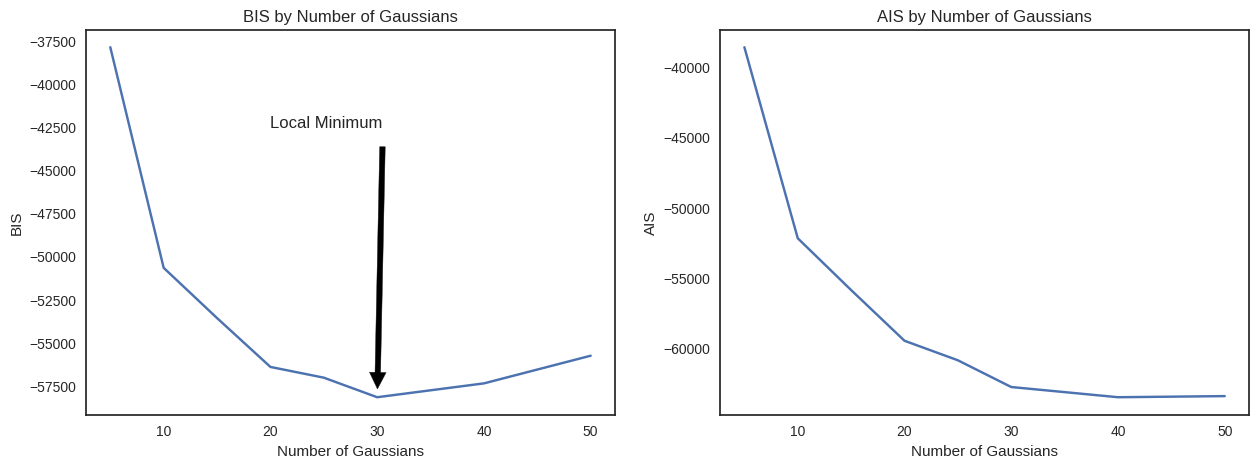

In [102]:
GMM_description = []
GMM_cls = []
gaussians_componenets = [5, 10, 15, 20, 25, 30, 40, 50]

for components in gaussians_componenets:
  GMM_description.append("GMM with {0} components".format(components))
  GMM_cls.append(GMM(n_components=components, covariance_type='diag'))

GMM_array = zip(GMM_description, GMM_cls)
find_best_GMM_configuration(train_X, train_y_values, GMM_array, gaussians_componenets)

#### Silhouette Scoring

('For n_clusters =', 5, 'The average silhouette_score is :', -0.010937490873018927)


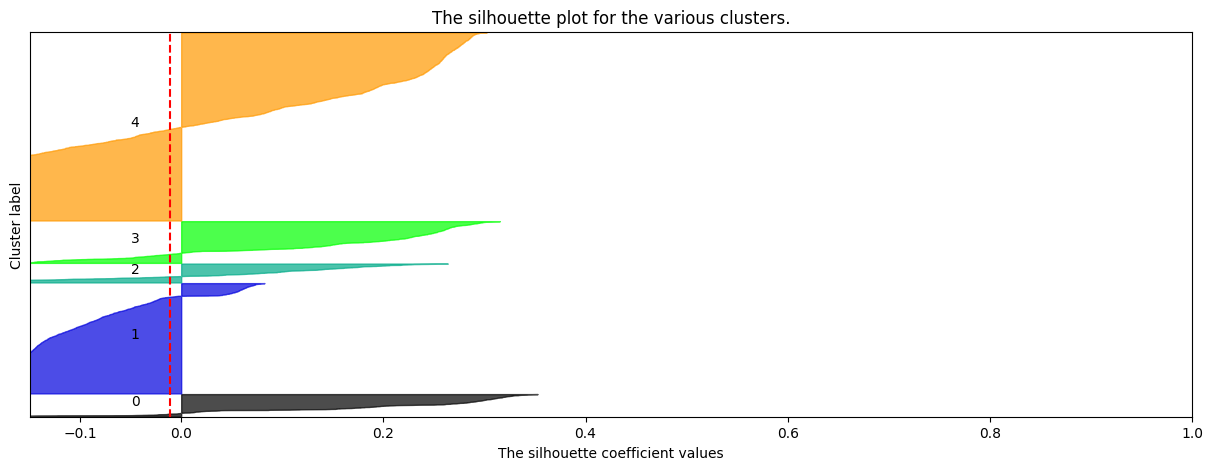

('For n_clusters =', 10, 'The average silhouette_score is :', -0.03891908381980327)


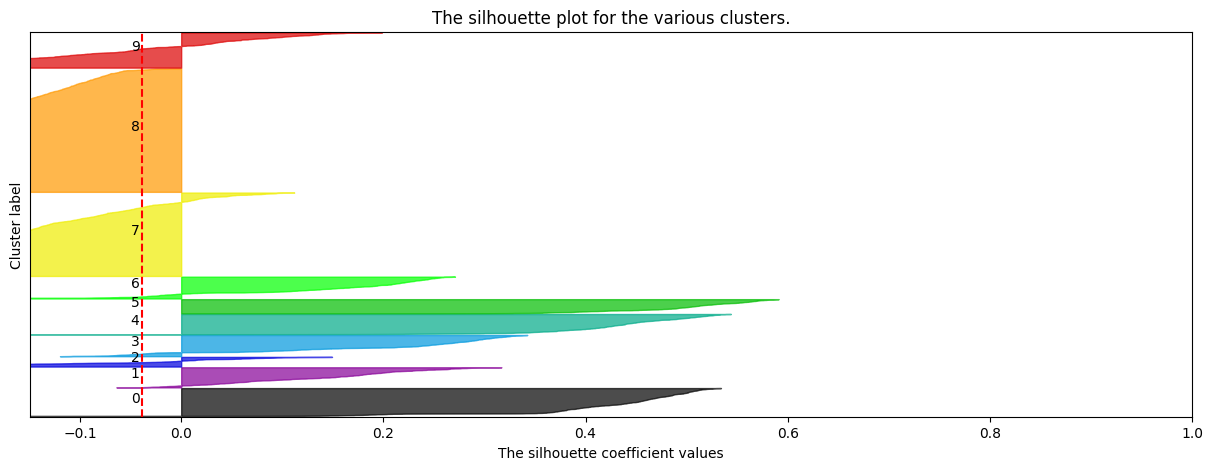

('For n_clusters =', 15, 'The average silhouette_score is :', -0.043750897219105175)


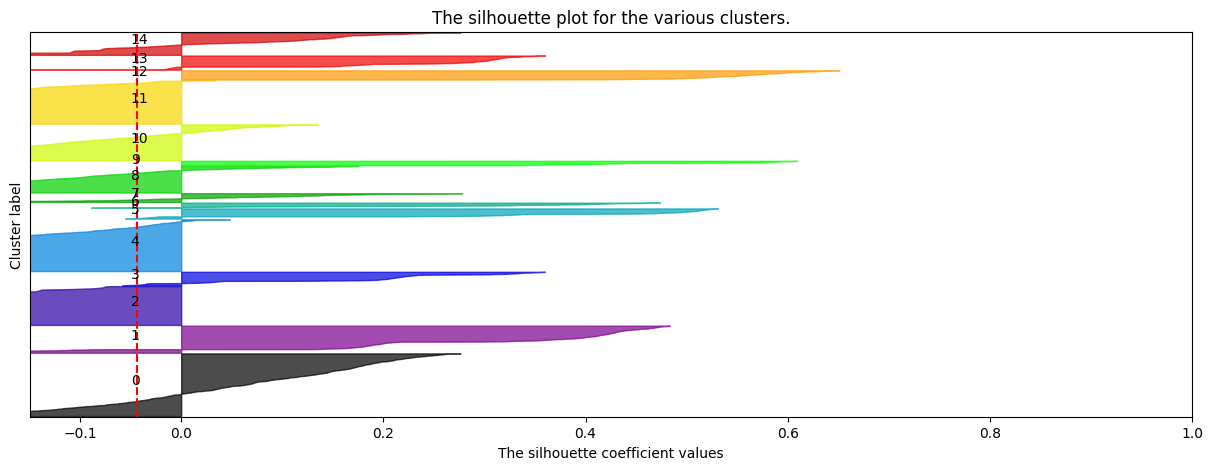

('For n_clusters =', 20, 'The average silhouette_score is :', -0.02957152953604225)


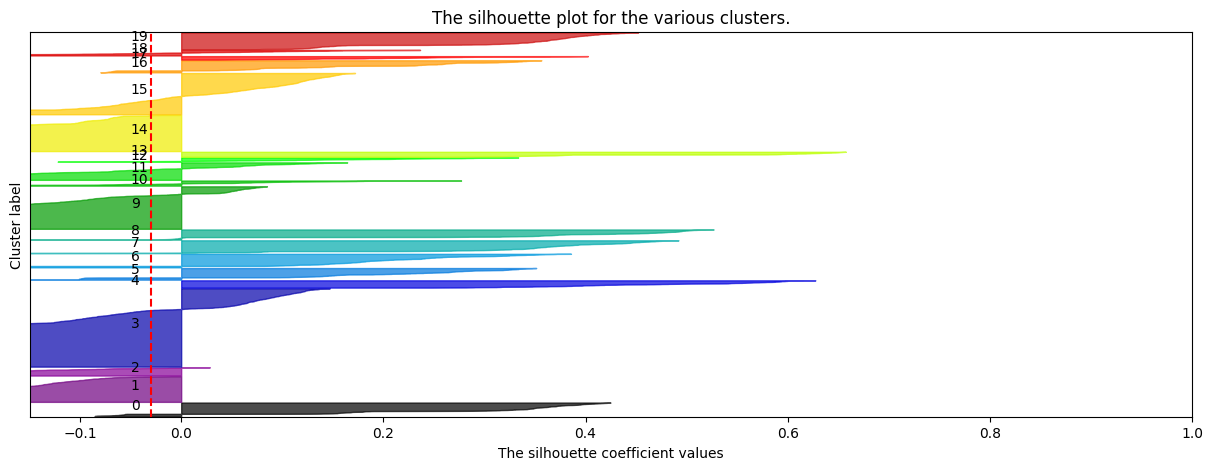

('For n_clusters =', 25, 'The average silhouette_score is :', -0.11388132694112194)


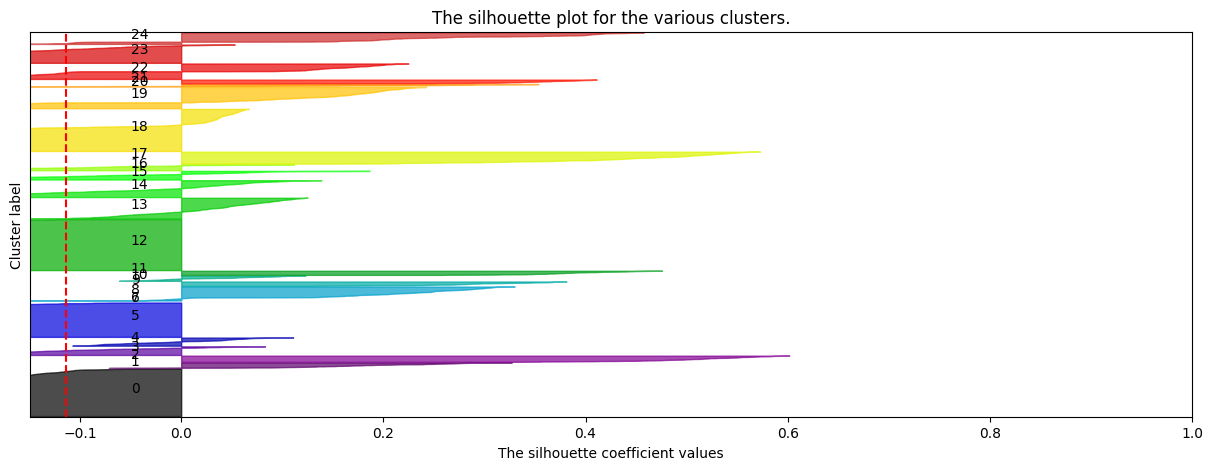

('For n_clusters =', 30, 'The average silhouette_score is :', -0.07362326042452255)


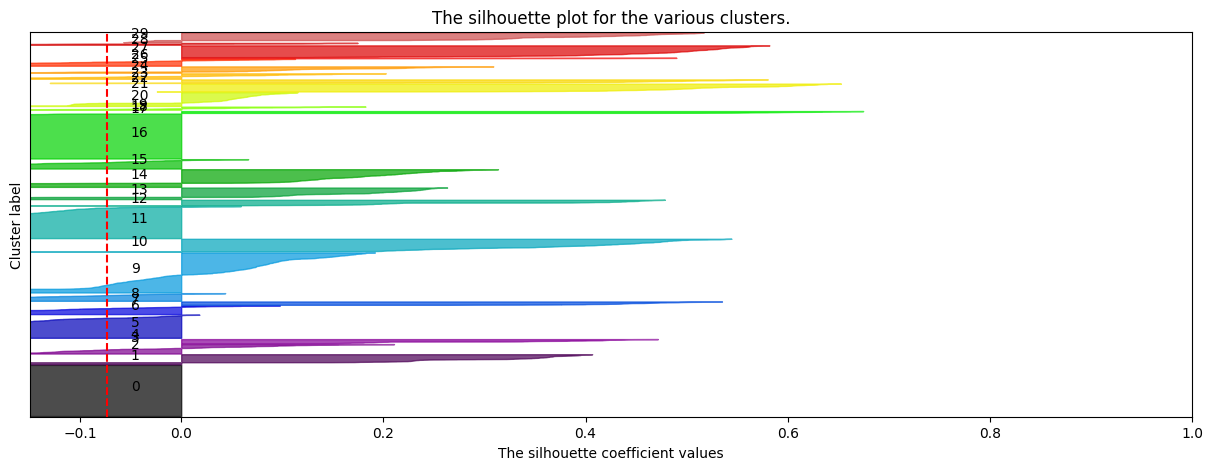

('For n_clusters =', 40, 'The average silhouette_score is :', -0.1082132523697182)


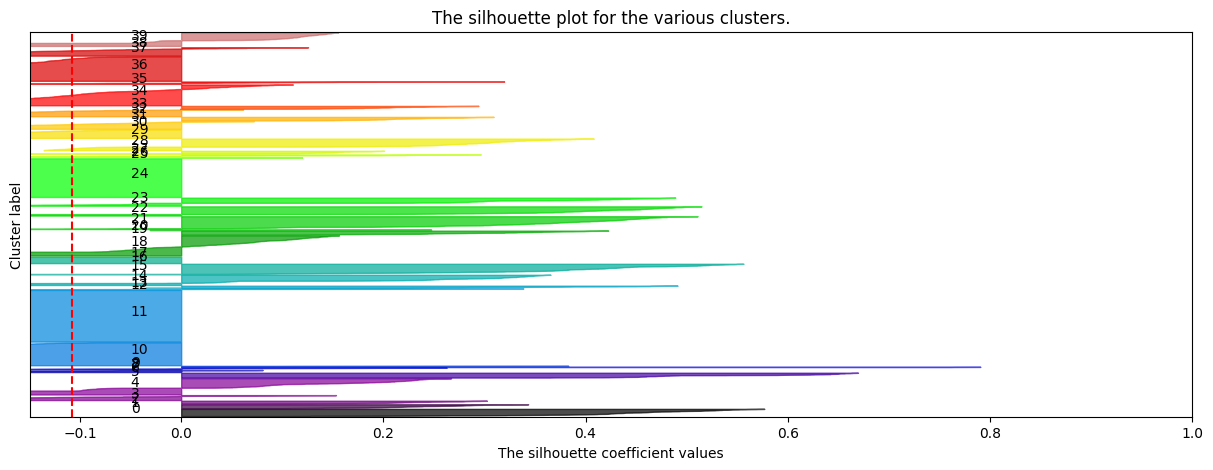

('For n_clusters =', 50, 'The average silhouette_score is :', -0.03769538963757686)


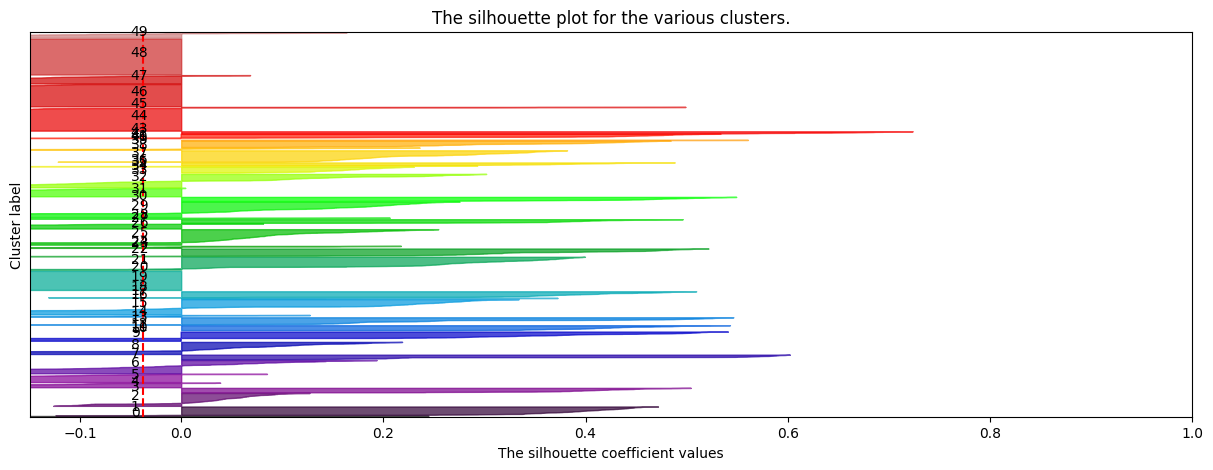

In [23]:
silhouette_func(train_X, train_y, GMM_array, gaussians_componenets)

###Choose Clustering Model Configuration (Manual) and Fit dataset 

In [24]:
selected_model_index = 5

cluster_count = gaussians_componenets[selected_model_index]
cluster_model_description, cluster_model = GMM_array[selected_model_index]
cluster_model.fit(train_X)

print cluster_model_description

GMM with 30 components


# 3. Load the valid dataset

## Download the valid dataset from the cloud storage

In [0]:
downloaded = drive.CreateFile({'id': '1HgtZC1iq9VYH8Ygo6-6XnC6G0xa8Lz01'})
downloaded.GetContentFile('valid_X.csv')

downloaded = drive.CreateFile({'id': '1Z_0zOORoZJVlOQ58UdXml4maSNSNBBMK'})
downloaded.GetContentFile('valid_y.csv')

In [26]:
!ls

BAK  datalab  train_X.csv  train_y.csv	valid_X.csv  valid_y.csv


## Load the valid dataset into dataframes (X, y)

In [0]:
valid_X = pd.read_csv("valid_X.csv", header=0)
valid_y = pd.read_csv("valid_y.csv", header=None)
valid_y.columns = ["Vote"]

# fix df_label as df_label[0] for easy writing..
valid_y_values = valid_y["Vote"]

## View the loaded valid dataset

In [28]:
valid_X.info()
valid_X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 17 columns):
Number_of_valued_Kneset_members                  1944 non-null float64
Yearly_IncomeK                                   1944 non-null float64
Overall_happiness_score                          1944 non-null float64
Avg_Satisfaction_with_previous_vote              1944 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    1944 non-null float64
Weighted_education_rank                          1944 non-null float64
Will_vote_only_large_party_1.0                   1944 non-null int64
Will_vote_only_large_party_0.0                   1944 non-null int64
Will_vote_only_large_party_2.0                   1944 non-null int64
Most_Important_Issue_4.0                         1944 non-null int64
Most_Important_Issue_1.0                         1944 non-null int64
Most_Important_Issue_7.0                         1944 non-null int64
Most_Important_Issue_5.0                         1944

,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank,Will_vote_only_large_party_1.0,Will_vote_only_large_party_0.0,Will_vote_only_large_party_2.0,Most_Important_Issue_4.0,Most_Important_Issue_1.0,Most_Important_Issue_7.0,Most_Important_Issue_5.0,Most_Important_Issue_2.0,Most_Important_Issue_0.0,Most_Important_Issue_6.0,Most_Important_Issue_3.0
0,12.0,-0.107043,-0.141038,0.691124,-0.480667,-0.275633,1,0,0,0,1,0,0,0,0,0,0
1,8.0,1.872975,-0.189318,-0.721718,1.867954,-0.110044,1,0,0,0,0,1,0,0,0,0,0
2,12.0,0.788380,1.631465,0.520939,-0.703350,0.511250,1,0,0,0,0,0,0,1,0,0,0
3,8.0,-0.098471,0.059599,0.688121,0.682170,-1.322242,1,0,0,1,0,0,0,0,0,0,0
4,9.0,-0.042849,0.565714,0.591769,-0.113672,-0.630451,1,0,0,0,0,1,0,0,0,0,0


In [29]:
valid_y.info()
valid_y.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 1 columns):
Vote    1944 non-null float64
dtypes: float64(1)
memory usage: 15.3 KB


,Vote
0,6.0
1,5.0
2,2.0
3,8.0
4,6.0


##Split the valid dataset by each party

In [30]:
display_parties_count(valid_y_values)

Party | Count
----- | -----
0.0   | 162
1.0   | 372
2.0   | 326
3.0   | 110
4.0   | 107
5.0   | 209
6.0   | 413
7.0   | 108
8.0   | 67
9.0   | 70
----- | -----
Total | 1944


In [31]:
valid_parties_dataframes_dictionary = get_parties_dataframes(valid_X, valid_y)

162
372
326
110
107
209
413
108
67
70


# 4. Load the test dataset

## Download the test dataset from the cloud storage

In [0]:
downloaded = drive.CreateFile({'id': '10F4pfym7OgqvT1xu6Bo27WqpZjsGhhih'})
downloaded.GetContentFile('test_X.csv')

downloaded = drive.CreateFile({'id': '1uGX6RQFot5gww3vExfpeg1GFR8ZMFYPX'})
downloaded.GetContentFile('test_y.csv')

In [33]:
!ls

BAK	 test_X.csv  train_X.csv  valid_X.csv
datalab  test_y.csv  train_y.csv  valid_y.csv


## Load the test dataset into dataframes (X, y)

In [0]:
test_X = pd.read_csv("test_X.csv", header=0)
test_y = pd.read_csv("test_y.csv", header=None)
test_y.columns = ["Vote"]

test_y_values = test_y["Vote"]

## View the loaded test dataset

In [35]:
test_X.info()
test_X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 17 columns):
Number_of_valued_Kneset_members                  1944 non-null float64
Yearly_IncomeK                                   1944 non-null float64
Overall_happiness_score                          1944 non-null float64
Avg_Satisfaction_with_previous_vote              1944 non-null float64
Garden_sqr_meter_per_person_in_residancy_area    1944 non-null float64
Weighted_education_rank                          1944 non-null float64
Will_vote_only_large_party_1.0                   1944 non-null int64
Will_vote_only_large_party_0.0                   1944 non-null int64
Will_vote_only_large_party_2.0                   1944 non-null int64
Most_Important_Issue_4.0                         1944 non-null int64
Most_Important_Issue_1.0                         1944 non-null int64
Most_Important_Issue_7.0                         1944 non-null int64
Most_Important_Issue_5.0                         1944

,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank,Will_vote_only_large_party_1.0,Will_vote_only_large_party_0.0,Will_vote_only_large_party_2.0,Most_Important_Issue_4.0,Most_Important_Issue_1.0,Most_Important_Issue_7.0,Most_Important_Issue_5.0,Most_Important_Issue_2.0,Most_Important_Issue_0.0,Most_Important_Issue_6.0,Most_Important_Issue_3.0
0,9.0,-0.419086,0.210792,-0.230510,-0.060646,-0.564397,1,0,0,0,0,0,0,1,0,0,0
1,8.0,0.514930,-0.619711,1.107421,-0.130600,-0.651318,1,0,0,0,0,0,0,1,0,0,0
2,13.0,0.779048,1.696267,-0.448178,-0.847467,0.694600,1,0,0,0,0,1,0,0,0,0,0
3,12.0,0.263978,0.147911,-0.669467,0.528262,-1.566185,1,0,0,0,0,0,0,1,0,0,0
4,10.0,-0.287698,0.103872,-0.726453,0.389199,-1.081211,0,1,0,0,0,0,0,0,0,0,1


In [36]:
test_y.info()
test_y.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 1 columns):
Vote    1944 non-null float64
dtypes: float64(1)
memory usage: 15.3 KB


,Vote
0,6.0
1,6.0
2,2.0
3,6.0
4,7.0


##Split the test dataset by each party

In [37]:
display_parties_count(test_y_values)

Party | Count
----- | -----
0.0   | 161
1.0   | 371
2.0   | 326
3.0   | 110
4.0   | 107
5.0   | 209
6.0   | 414
7.0   | 109
8.0   | 67
9.0   | 70
----- | -----
Total | 1944


In [38]:
valid_parties_dataframes_dictionary = get_parties_dataframes(test_X, test_y)

161
371
326
110
107
209
414
109
67
70


# 5. Apply the trained models on the valid/test dataset and check performance

##Utilities

In [0]:
from sklearn import metrics
import seaborn as sns

def get_predicted_clusters(cluster_model, X):
  cluster_labels = cluster_model.predict(X)
  print cluster_labels
  return cluster_labels


def plot_silhouette_graph_score(X, cluster_labels, scores):
  sns.set(style="white", color_codes=True)

  # note that this is the mean over all the samples - there might be some clusters 
  # that are well separated and others that are closer together. 
  # so let's look at the distribution of silhouette scores...  
  sns.distplot(scores)
  plt.show()
  
def plot_silhouette_score_per_party(cluster_labels, scores):
  df_scores = pd.DataFrame()
  df_scores['SilhouetteScore'] = scores
  df_scores['cluster_labels'] = cluster_labels
  df_scores.hist(by='cluster_labels', column='SilhouetteScore', range=(-1.0,1.0), bins=20);
  plt.show()

##Apply Clustering Model on the valid/test dataset 

In [40]:
valid_cluster_labels = get_predicted_clusters(cluster_model, valid_X)
valid_scores = metrics.silhouette_samples(valid_X, valid_cluster_labels)

test_cluster_labels = get_predicted_clusters(cluster_model, test_X)
test_scores = metrics.silhouette_samples(test_X, test_cluster_labels)

[ 4 26 15 ... 15 26 15]
[15 15 23 ... 12 23  8]


##Check Clustering Performance and Parties Preferences

### Silhouette Performance Score:
a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [0]:
print "Silhouette Performance Score (valid):"
#plot_silhouette_score(valid_X, valid_cluster_labels)
plot_silhouette_score_per_party(valid_X, valid_cluster_labels)

In [0]:
print "Silhouette Performance Score (test):"
plot_silhouette_score(test_X, test_cluster_labels)

### AIC & BIC Performance Check 

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture as GMM

def check_GMM_performance(train_X, train_y, data_X, GMM_array, number_of_gaussians):
  """
  Using KFold on the train set, and AIC & BIC for evaluation and choosing Hyper-Parameters
  run cross-validation on train-set with all GMMs:
  NOTE: lets talk about our consideration whether to use Stratified sampling in KFold or not:
        - we know that our data is NOT balanced across the different classes (since some parties are much bigger than others)
        - BUT, we assumed that the ERROR of our model is balanced across the classes, and THIS IS WHAT MATTER!
        - So, we've verified this assumption by empiricli check the results of both Stratified and UnStratified KFold:
        + and indeed, they came up nearly identical. 
        ++ So, we can say that most likely - our assumption was good and we can use Stratified KFold. :)
  """
  bic_arr = []
  aic_arr = []

  for name, cls in GMM_array:
    cls.fit(train_X, train_y)
    y_pred = cls.predict(data_X)
    aic = cls.aic(data_X)
    bic = cls.bic(data_X)
    aic_arr.append(aic)
    bic_arr.append(bic)
    print(name + " has scored AIC: " + str(aic) + " and BIC: " + str(bic))
    
  ## plot AIC and BIC parameters for each GMM
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 15
  fig_size[1] = 5
  plt.rcParams["figure.figsize"] = fig_size

  plt.subplot(1, 2, 1)
  plt.plot(number_of_gaussians, bic_arr)
  plt.title('BIC by Number of Gaussians')
  plt.ylabel('BIC')
  plt.xlabel('Number of Gaussians')
  plt.annotate('Again! Local Minimum', xy=(30, -200000), xytext=(20, -140000), arrowprops=dict(facecolor='black', shrink=0.05),)

  plt.subplot(1, 2, 2)
  plt.plot(number_of_gaussians, aic_arr)
  plt.title('AIC by Number of Gaussians')
  plt.ylabel('AIC')
  plt.xlabel('Number of Gaussians')
  plt.show()
  
def evaluate_performance(X, y, data_X):
  GMM_description = []
  GMM_cls = []
  gaussians_componenets = [5, 10, 15, 20, 25, 30, 40, 50]

  for components in gaussians_componenets:
    GMM_description.append("GMM with {0} components".format(components))
    GMM_cls.append(GMM(n_components=components, covariance_type='diag'))

  GMM_array = zip(GMM_description, GMM_cls)
  check_GMM_performance(X, y, data_X, GMM_array, gaussians_componenets)

AIC & BIC Performance Score (valid):
GMM with 5 components has scored AIC: -139935.9268666556 and BIC: -138966.31134726203
GMM with 10 components has scored AIC: -187153.2801106869 and BIC: -185208.47656891478
GMM with 15 components has scored AIC: -184350.10034857475 and BIC: -181430.10878442408
GMM with 20 components has scored AIC: -197700.47861419892 and BIC: -193805.29902766968
GMM with 25 components has scored AIC: -214893.15653614458 and BIC: -210022.78892723678
GMM with 30 components has scored AIC: -218533.1763492521 and BIC: -212687.62071796574
GMM with 40 components has scored AIC: -219106.94123649594 and BIC: -211311.00956045242
GMM with 50 components has scored AIC: -220488.07706876856 and BIC: -210741.7693479679


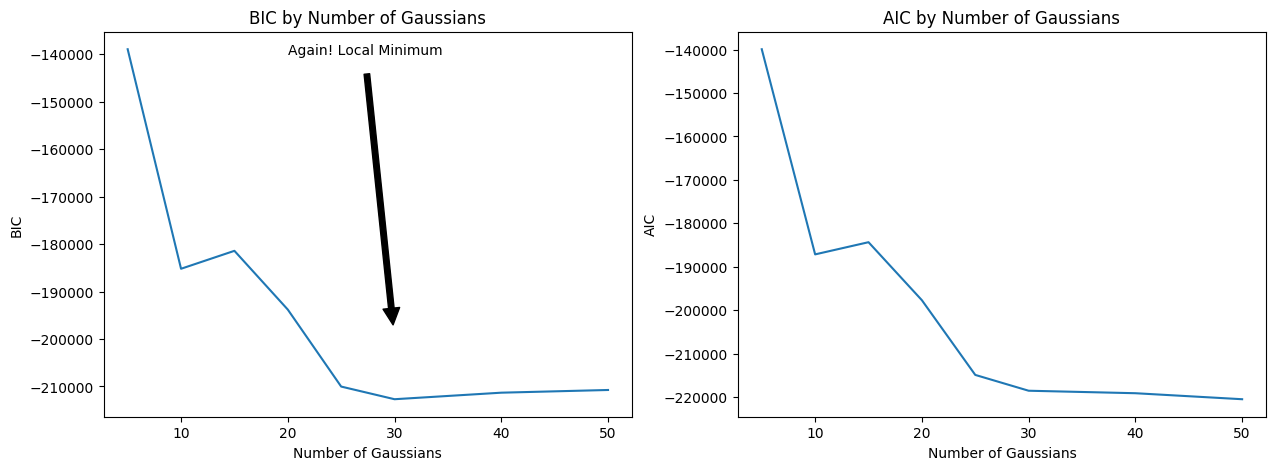

In [45]:
print "AIC & BIC Performance Score (valid):"
evaluate_performance(train_X, train_y, valid_X)

AIC & BIC Performance Score (test):
GMM with 5 components has scored AIC: -150039.1487070482 and BIC: -149069.53318765466
GMM with 10 components has scored AIC: -162492.32480640424 and BIC: -160547.52126463212
GMM with 15 components has scored AIC: -189824.03516353626 and BIC: -186904.0435993856
GMM with 20 components has scored AIC: -194562.49072476022 and BIC: -190667.311138231
GMM with 25 components has scored AIC: -204242.30719413882 and BIC: -199371.939585231
GMM with 30 components has scored AIC: -220660.28658847586 and BIC: -214814.7309571895
GMM with 40 components has scored AIC: -219369.394936056 and BIC: -211573.46326001248
GMM with 50 components has scored AIC: -220285.84999002697 and BIC: -210539.5422692263


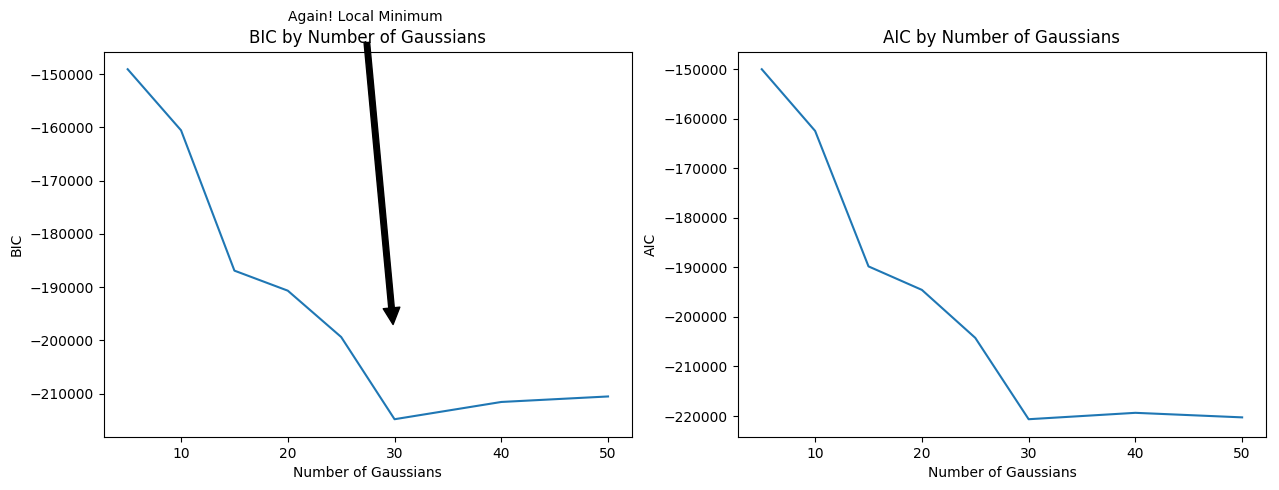

In [46]:
print "AIC & BIC Performance Score (test):"
evaluate_performance(train_X, train_y, test_X)

# 6. Create a Steady Coalition

## Utilities

In [0]:
import operator

def get_parties_size(predicted_labels):
  parties_size = group_by_count(predicted_labels)
  return parties_size

def display_parties_votes(predicted_labels):
  display_parties_count([predicted_labels])

def get_winning_party(parties_size):
  winning_party = max(parties_size.iteritems(), key=operator.itemgetter(1))[0]
  print "Winning Party: {0} ({1})".format(winning_party, labels_dictionary[winning_party])
  return winning_party, labels_dictionary[winning_party]

def plot_parties_votes_pie(parties_size, pie_size=10):
  labels = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
  colors = ["blue", "brown", "green", "grey", "orange", "pink", "purple", "red", "white", "yellow"]
  prediction_values = parties_size.values()

  # Pie chart, where the slices will be ordered and plotted counter-clockwise:
  ratio = 0.0
  explode = (ratio, ratio, ratio, ratio, ratio, ratio, ratio, ratio, ratio, ratio)

  fig1, ax1 = plt.subplots(figsize=(pie_size,pie_size))
  ax1.pie(prediction_values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()
  
def simulate_elections(predicted_labels, pie_size=10):
  parties_size = get_parties_size(predicted_labels)
  display_parties_votes(predicted_labels)
  print ""
  winning_party = get_winning_party(parties_size)
  plot_parties_votes_pie(parties_size, pie_size)

## Apply Clustering Model on unlabeled dataset

In [48]:
predicted_cluster_labels = get_predicted_clusters(cluster_model, predicted_X)
predicted_scores = metrics.silhouette_samples(predicted_X, predicted_cluster_labels)

[ 7 14  0 ... 12  0 23]


In [49]:
parties_size = get_parties_size(predicted_y_values)
print parties_size
total_parties_size = sum(parties_size.values())
print total_parties_size

{0.0: 895, 1.0: 1873, 2.0: 1032, 3.0: 662, 4.0: 462, 5.0: 1213, 6.0: 2645, 7.0: 569, 8.0: 188, 9.0: 461}
10000


In [0]:
print "Silhouette Performance Score (predicted):"
plot_silhouette_score(predicted_X, predicted_cluster_labels)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture as GMM

def check_GMM_performance(train_X, train_y, data_X, GMM_array, number_of_gaussians):
  """
  Using KFold on the train set, and AIC & BIC for evaluation and choosing Hyper-Parameters
  run cross-validation on train-set with all GMMs:
  NOTE: lets talk about our consideration whether to use Stratified sampling in KFold or not:
        - we know that our data is NOT balanced across the different classes (since some parties are much bigger than others)
        - BUT, we assumed that the ERROR of our model is balanced across the classes, and THIS IS WHAT MATTER!
        - So, we've verified this assumption by empiricli check the results of both Stratified and UnStratified KFold:
        + and indeed, they came up nearly identical. 
        ++ So, we can say that most likely - our assumption was good and we can use Stratified KFold. :)
  """
  bic_arr = []
  aic_arr = []

  for name, cls in GMM_array:
    cls.fit(train_X, train_y)
    y_pred = cls.predict(data_X)
    aic = cls.aic(data_X)
    bic = cls.bic(data_X)
    aic_arr.append(aic)
    bic_arr.append(bic)
    print(name + " has scored AIC: " + str(aic) + " and BIC: " + str(bic))
    
  ## plot AIC and BIC parameters for each GMM
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 15
  fig_size[1] = 5
  plt.rcParams["figure.figsize"] = fig_size

  plt.subplot(1, 2, 1)
  plt.plot(number_of_gaussians, bic_arr)
  plt.title('BIC by Number of Gaussians')
  plt.ylabel('BIC')
  plt.xlabel('Number of Gaussians')
  #plt.annotate('Again! Local Minimum', xy=(30, -200000), xytext=(20, -140000), arrowprops=dict(facecolor='black', shrink=0.05),)
  #plt.annotate('Again! Local Minimum', xy=(30, -200000), xytext=(20, -140000), arrowprops=dict(facecolor='black', shrink=0.05), clip_on=True)

  plt.subplot(1, 2, 2)
  plt.plot(number_of_gaussians, aic_arr)
  plt.title('AIC by Number of Gaussians')
  plt.ylabel('AIC')
  plt.xlabel('Number of Gaussians')
  plt.show()
  
def evaluate_performance(X, y, data_X):
  GMM_description = []
  GMM_cls = []
  #gaussians_componenets = [5, 10, 15, 20, 25, 30, 40, 50]
  #gaussians_componenets = [2, 3, 4, 5, 6, 7, 8]
  gaussians_componenets = [7, 9, 11, 13, 15]


  for components in gaussians_componenets:
    GMM_description.append("GMM with {0} components".format(components))
    GMM_cls.append(GMM(n_components=components, covariance_type='diag'))

  GMM_array = zip(GMM_description, GMM_cls)
  check_GMM_performance(X, y, data_X, GMM_array, gaussians_componenets)

AIC & BIC Performance Score (predicted):
GMM with 7 components has scored AIC: 4467267559.713806 and BIC: 4467269319.036857
GMM with 9 components has scored AIC: 4467140554.888863 and BIC: 4467142818.9357395
GMM with 11 components has scored AIC: 4467048152.307008 and BIC: 4467050921.07771
GMM with 13 components has scored AIC: 4467068810.801445 and BIC: 4467072084.295974
GMM with 15 components has scored AIC: 4467110248.043435 and BIC: 4467114026.26179


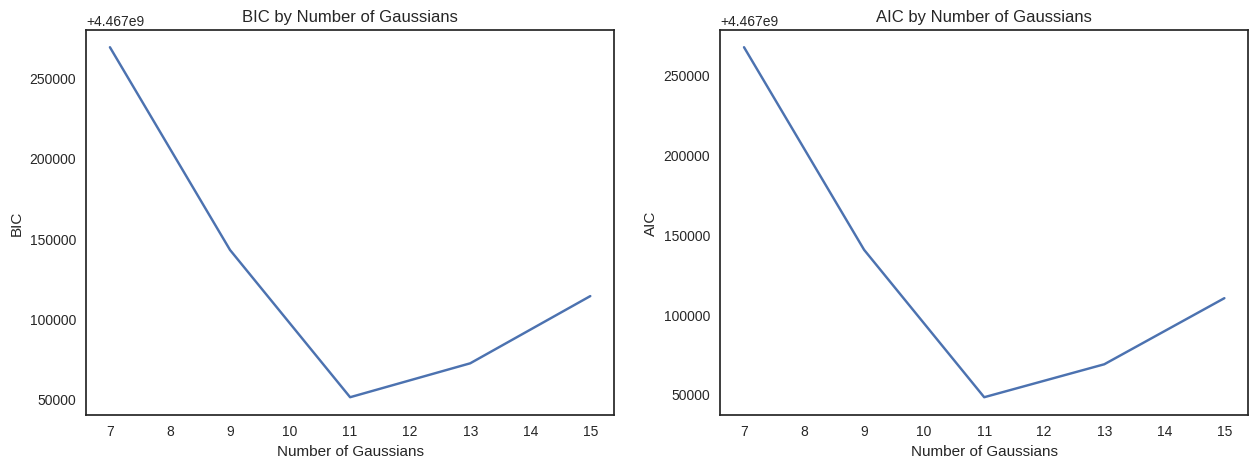

In [145]:
print "AIC & BIC Performance Score (predicted):"
# options: train_X, train_y or 'None' or predicted_y_values, predicted_X
evaluate_performance(train_X, 'None', predicted_X)

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#gaussians_componenets = [5, 10, 15, 20, 25, 30]
gaussians_componenets = [4, 5, 7, 9, 11, 13, 15, 17]

tuned_parameters = {'n_components': gaussians_componenets, 
                    'covariance_type': ['diag']}

clf = GridSearchCV(GMM(), tuned_parameters, cv=StratifiedKFold(n_splits=10))
clf.fit(predicted_X, predicted_y_values)
print "Best parameters set found on training set: {0}, with score: {1}".format(clf.best_params_, clf.best_score_)

Best parameters set found on training set: {'covariance_type': 'diag', 'n_components': 13}, with score: 47.0603205844


In [0]:
#gaussians_componenets = [5, 10, 15, 20, 25, 30, 40, 50]
gaussians_componenets = [7, 9, 11, 13, 15]
silhouette_func(predicted_X, predicted_y_values, GMM_array, gaussians_componenets)

In [0]:
GMM_description = []
GMM_cls = []
gaussians_componenets = [7, 9, 11, 13, 15]

for components in gaussians_componenets:
  GMM_description.append("GMM with {0} components".format(components))
  GMM_cls.append(GMM(n_components=components, covariance_type='diag'))

GMM_array = zip(GMM_description, GMM_cls)

In [150]:
selected_model_index = 3

cluster_count = gaussians_componenets[selected_model_index]
cluster_model_description, cluster_model = GMM_array[selected_model_index]
cluster_model.fit(train_X)

print cluster_model_description

GMM with 13 components


[3 1 8 ... 6 8 9]


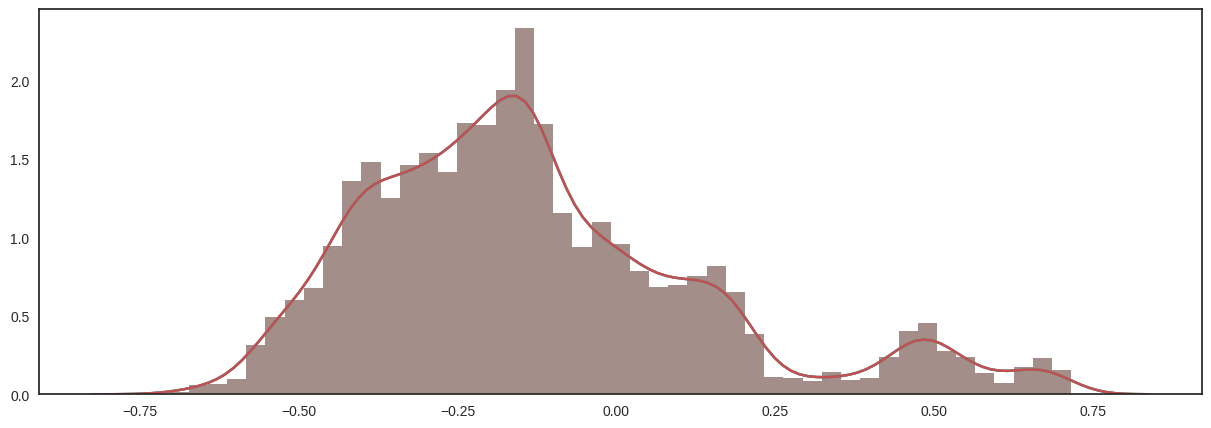

In [160]:
predicted_cluster_labels = get_predicted_clusters(cluster_model, predicted_X)
predicted_scores = metrics.silhouette_samples(predicted_X, predicted_cluster_labels)
sns.distplot(predicted_scores)
plt.show()

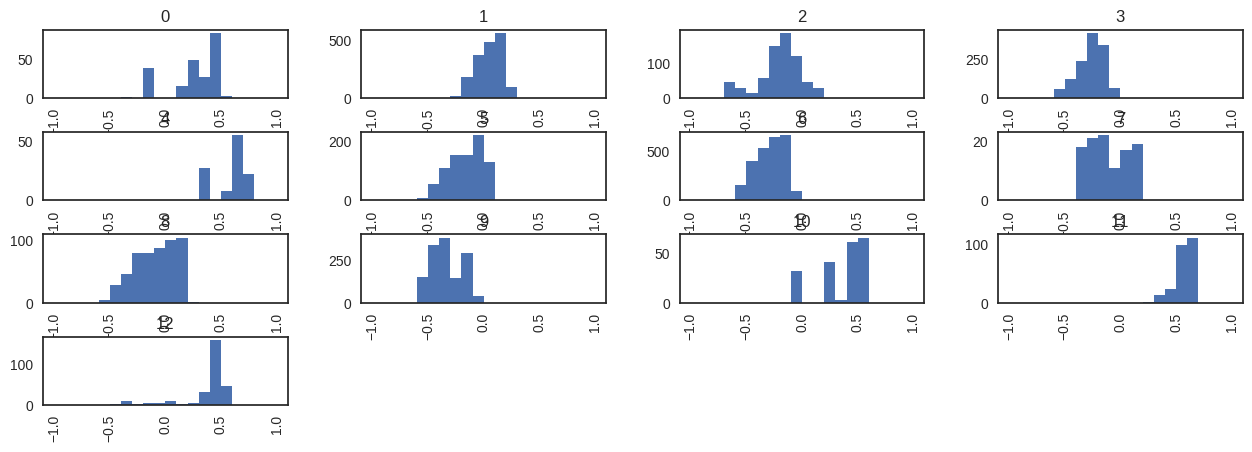

In [163]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = predicted_scores
df_scores['cluster_labels'] = predicted_cluster_labels
df_scores.hist(by='cluster_labels', column='SilhouetteScore', range=(-1.0,1.0), bins=20);
plt.show()

In [152]:
parties_size = get_parties_size(predicted_y_values)
print parties_size
total_parties_size = sum(parties_size.values())
print total_parties_size

{0.0: 895, 1.0: 1873, 2.0: 1032, 3.0: 662, 4.0: 462, 5.0: 1213, 6.0: 2645, 7.0: 569, 8.0: 188, 9.0: 461}
10000


In [0]:
print "Silhouette Performance Score (predicted):"
plot_silhouette_score_per_party(predicted_X, predicted_cluster_labels)

##Clustering - Create count for each party in each cluster and then build parties preferences matrix

In [0]:
def calculate_parties_preferences(cluster_labels, y, parties_size, clusters_count=30):
  # create clusters_array
  # 30X10 matrix in which every row is represents a cluster
  # and every col in this row means how many of this party (0,1,...,9) are in this cluster
  clusters_array = []
  clusters_array_for_count = []
  for count in xrange(clusters_count):
    clusters_array.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    clusters_array_for_count.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

  # fill clusters_array
  # each line in the array is a list of the parties dominancy inside the cluster.
  # the number is the party' dominancy in percentage (how many percent from the whole party is inside this cluster?)
  label_column = y.columns[0]
  cluster_enum = zip(cluster_labels, y[label_column])
  for gl, yl in cluster_enum:
    #print 'gl: ' + str(gl) + ' \t yl: ' + str(yl)
    # normalize count in the size of party: (1/parties_size[yl])
    #clusters_array[gl.astype(int)][yl.astype(int)] += (1.0/parties_size[yl]) 
    #clusters_array_for_count[gl.astype(int)][yl.astype(int)] += (1.0) 
    clusters_array[int(gl)][int(yl)] += (1.0/parties_size[yl]) 
    clusters_array_for_count[int(gl)][int(yl)] += (1.0) 

  # create parties_pref
  # 10X10 matrix in which every row represents the party dist:
  # every col is a percentage that party shared with the other parties
  # example: row 0 means party 0, and col 3 means how much party 0 shared a cluster with party 3.
  parties_pref = []
  for c in xrange(10):
    parties_pref.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  parties_pref

  for parties_pref_row in range(len(parties_pref)):
    # iterate over big matrix clusters_array - and calc pref for each party (i.e each row in parties_pref)
    for i in range(len(clusters_array)):
      for j in range(len(clusters_array[i])):
        parties_pref[parties_pref_row][j] += (clusters_array[i][parties_pref_row] * clusters_array[i][j])

  parties_pref_final = [[], [], [], [], [], [], [], [], [], []]
  for i in range(len(parties_pref)):
    parties_pref_final[i] = [j[0] for j in sorted(enumerate(parties_pref[i]), key=lambda x:x[1], reverse=True)]

  # remove from each party preferences itself (since it can't build a coalition with itself)
  #parties_pref_final2 = parties_pref_final
  for i in range(len(parties_pref_final)):
    parties_pref_final[i].remove(i)  

  return parties_pref_final, clusters_array_for_count

In [153]:
# Create parties preferences according to the clusters and the presence of each party in every cluster
parties_preferences, clusters_array_for_count = calculate_parties_preferences(predicted_cluster_labels, predicted_y, group_by_count(predicted_y_values), cluster_count)
print parties_preferences
print clusters_array_for_count

[[9, 1, 8, 5, 6, 2, 3, 7, 4], [5, 8, 2, 6, 3, 7, 4, 0, 9], [5, 1, 8, 6, 3, 7, 4, 0, 9], [4, 7, 1, 5, 2, 8, 6, 0, 9], [3, 7, 1, 5, 2, 8, 6, 0, 9], [1, 8, 2, 6, 3, 7, 4, 0, 9], [5, 8, 1, 2, 3, 7, 4, 0, 9], [4, 3, 1, 8, 5, 2, 6, 0, 9], [5, 1, 6, 2, 3, 7, 4, 0, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8]]
[[0, 0, 216.0, 0, 0, 0, 0, 0, 0, 0], [0, 44.0, 0, 653.0, 460.0, 0, 0, 560.0, 0, 0], [0, 2.0, 0, 0, 0, 0, 665.0, 0, 0, 0], [2.0, 502.0, 1.0, 0, 0, 250.0, 444.0, 0, 49.0, 0], [0, 0, 0, 0, 0, 112.0, 0, 0, 0, 0], [551.0, 0, 0, 0, 0, 0, 0, 0, 0, 271.0], [1.0, 776.0, 418.0, 7.0, 2.0, 537.0, 690.0, 4.0, 65.0, 0], [0, 0, 0, 0, 0, 33.0, 73.0, 0, 2.0, 0], [341.0, 0, 0, 0, 0, 0, 0, 0, 0, 190.0], [0, 244.0, 193.0, 0, 0, 257.0, 610.0, 0, 50.0, 0], [0, 0, 202.0, 0, 0, 0, 0, 0, 0, 0], [0, 78.0, 2.0, 0, 0, 24.0, 134.0, 0, 6.0, 0], [0, 227.0, 0, 2.0, 0, 0, 29.0, 5.0, 16.0, 0]]


##Build a Steady Coalition (given parties preferences and winning party)

In [0]:
from __future__ import division

def build_coalition(winning_party, parties_sizes, total_size, parties_preferences):
  # init the coalition with the winning_party
  coalition_array = []
  coalition_array.append(winning_party)
  coalition_size = parties_sizes[winning_party]
  i = 0
  coalition_percentage = (coalition_size / total_size)
  
  while coalition_percentage < 0.5:
    # add the next prefered party to the coalition
    coalition_array.append(parties_preferences[winning_party][i])
    coalition_size += parties_sizes[parties_preferences[winning_party][i]]
    coalition_percentage = (coalition_size / total_size)
    # increment the index in the parties_preferences of the winning_party
    i += 1
    
  print "Coalition Size: {0}".format(coalition_size)
  print "Coalition Percentage: {0}".format(coalition_percentage)
  print "Coalition Parties: {0} ({1})".format(coalition_array, [labels_dictionary[party] for party in coalition_array])
  return coalition_array, coalition_size, coalition_percentage

In [154]:
# build steady coalition
winning_party = 6.0
coalition_array, coalition_size, coalition_percentage = build_coalition(int(winning_party), parties_size, total_parties_size, parties_preferences)

Coalition Size: 5919
Coalition Percentage: 0.5919
Coalition Parties: [6, 5, 8, 1] (['Purple', 'Pink', 'White', 'Brown'])


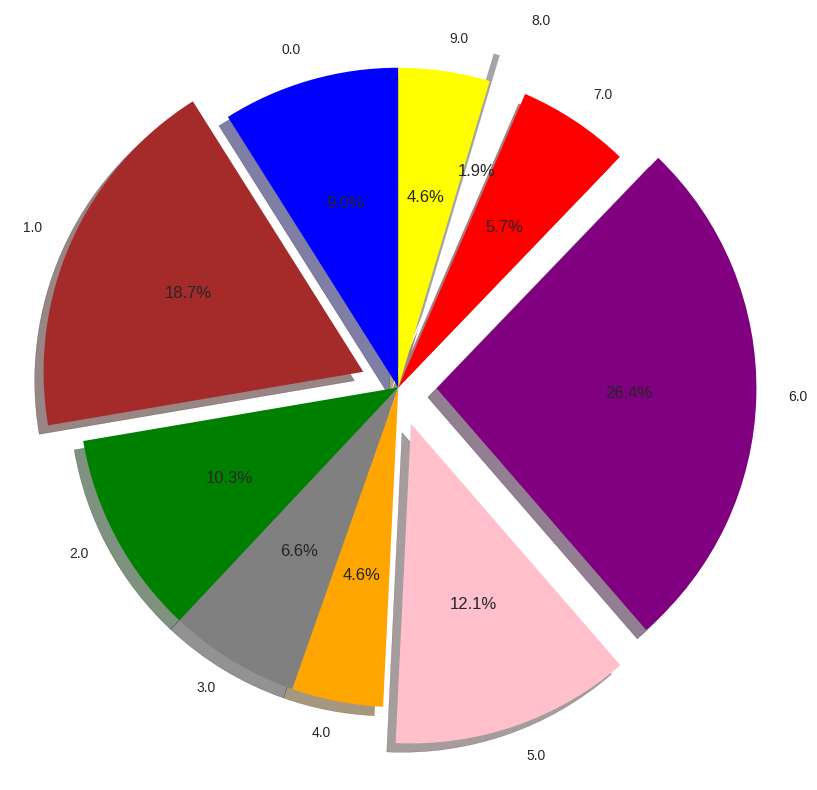

In [164]:
labels = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
colors = ["blue", "brown", "green", "grey", "orange", "pink", "purple", "red", "white", "yellow"]
prediction_values = parties_size.values()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#explode = (0.0, 0.12, 0.12, 0.0, 0.0, 0.0, 0.12, 0.0, 0.12, 0.0)
explode = (0.0, 0.12, 0.0, 0.0, 0.0, 0.12, 0.12, 0.0, 0.12, 0.0)

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(prediction_values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()